In [60]:
import numpy as np

In [9]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [10]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
data = pd.read_csv('cost.csv', parse_dates = ['effective_date'])

In [15]:
data.head()

,company_name,company_contact,company_email,company_phone,address,city,state,zip,industry,industry_descr,company_type,current_fulltime,job_created,job_retain,effective_date,total_savings,savings_from_beginning,borough,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,2005-03-04,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,2008-04-02,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,2015-01-05,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,2020-02-03,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,2017-06-30,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


## Scatter plot of jobs created versus average savings.

In [52]:
nta_final = pd.read_csv('nta_final.csv')

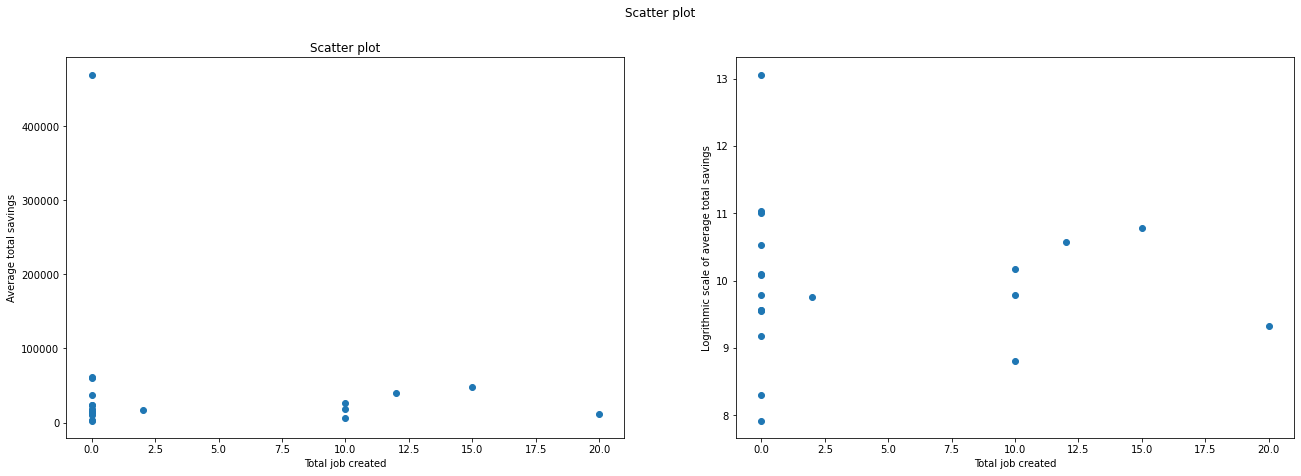

In [77]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (22, 7))
ax1.scatter(nta_final.iloc[:,2], nta_final.iloc[:,1])
ax2.scatter(nta_final.iloc[:,2], np.log(nta_final.iloc[:,1]))
ax1.set_xlabel('Total job created')
ax1.set_ylabel('Average total savings')
ax2.set_xlabel('Total job created')
ax2.set_ylabel('Logrithmic scale of average total savings')
ax1.set_title('Scatter plot')
fig.suptitle('Scatter plot')
plt.show()

## Histogram of the log of the average total savings

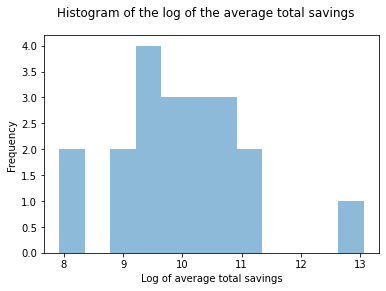

In [84]:
log = np.log(nta_final.iloc[:,1])
log.plot.hist(bins = 12, alpha = 0.5)
plt.xlabel('Log of average total savings')
plt.suptitle('Histogram of the log of the average total savings')
plt.show()

## line plot of the total jobs created for each month

In [111]:
data = data.reset_index(drop = True)
data['date_by_month']= data.effective_date.dt.month

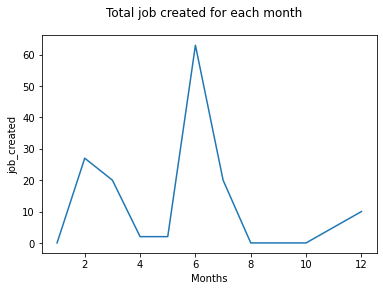

In [119]:
data.groupby('date_by_month').job_created.sum().plot()
plt.ylabel('job_created')
plt.xlabel('Months')
plt.suptitle('Total job created for each month')
plt.show()
